1. Sélectionner les observations et variables
Objectif : Charger, filtrer sur septembre 2025 et isoler les variables métiers.

In [6]:
import pandas as pd
import json

df_leads = pd.read_csv('leads_smartmarket.csv')
df_campaigns = pd.read_json('campaign_smartmarket.json')
df_crm = pd.read_excel('crm_smartmarket.xlsx')

df_merged = pd.merge(df_leads, df_crm, on='lead_id', how='left')

# Filtrage temporel (Périmètre : Septembre 2025 uniquement)
df_merged['date'] = pd.to_datetime(df_merged['date'])
mask = (df_merged['date'] >= '2025-09-01') & (df_merged['date'] <= '2025-09-30')
df_final = df_merged.loc[mask].copy()

variables_utiles = ['lead_id', 'date', 'channel', 'device', 'company_size', 'sector', 'region', 'status']
df_final = df_final[variables_utiles]

print(f"Analyse sur {len(df_final)} observations.")
display(df_final.head())

Analyse sur 445 observations.


,lead_id,date,channel,device,company_size,sector,region,status
0,3012,2025-09-01,Emailing,Tablet,10-50,Retail,Central,Pending
1,4252,2025-09-01,Organic,Desktop,10-50,Tech,South,Active
2,2815,2025-09-01,Instagram Ads,Mobile,10-50,Manufacturing,North,Pending
3,2428,2025-09-01,Emailing,Mobile,10-50,Healthcare,West,Inactive
4,3727,2025-09-01,Organic,Desktop,10-50,Retail,North,Active


# **Interpretation**

L’analyse s'appuie sur une sélection de variables stratégiques permettant de piloter l'activité de SmartMarket. Le lead_id et la date garantissent l'intégrité technique des données et le respect du périmètre de septembre 2025. Channel et status permettent de mesurer l'efficacité de chaque levier marketing et la qualité réelle des conversions (MQL, SQL ou Client). Enfin, les variables device, company_size, sector et region fournissent une segmentation précise de l'audience, essentielle pour identifier les profils les plus réactifs et optimiser l'expérience utilisateur selon les terminaux et les zones géographiques.

2. Réaliser une analyse univariée et bivariée

In [8]:

# ANALYSE UNIVARIÉE

# A. Variables Quantitatives (Campagnes)
# Calcul des statistiques : moyenne, médiane, min, max, écart-type
quant_cols = ['cost', 'impressions', 'clicks', 'conversions']
stats_quant = df_campaigns[quant_cols].describe().loc[['mean', '50%', 'min', 'max', 'std']]
stats_quant.rename(index={'50%': 'median'}, inplace=True)

print("ANALYSE UNIVARIÉE : VARIABLES QUANTITATIVES")
print("\nStatistiques descriptives :")
print(stats_quant)

# B. Variables Qualitatives (Leads & CRM)
# Fréquences et proportions pour Channel, Device, Sector et Status
qual_vars = ['channel', 'device', 'sector', 'status']

print("\n ANALYSE UNIVARIÉE : VARIABLES QUALITATIVES")
for var in qual_vars:
    counts = df_final[var].value_counts()
    props = df_final[var].value_counts(normalize=True) * 100
    summary = pd.DataFrame({'Effectif': counts, 'Proportion (%)': props})
    print(f"\nDistribution de la variable : {var}")
    print(summary)

ANALYSE UNIVARIÉE : VARIABLES QUANTITATIVES

Statistiques descriptives :
                cost    impressions        clicks  conversions
mean    25518.757108  503067.921400  49735.968400  4959.133400
median  25541.555000  504237.500000  49349.000000  4855.500000
min      1005.020000    1152.000000     29.000000     1.000000
max     49998.720000  999385.000000  99993.000000  9996.000000
std     14090.121052  287763.570589  28618.519782  2903.033105

 ANALYSE UNIVARIÉE : VARIABLES QUALITATIVES

Distribution de la variable : channel
               Effectif  Proportion (%)
channel                                
Google Ads           85       19.101124
Instagram Ads        83       18.651685
Emailing             80       17.977528
Facebook Ads         71       15.955056
Organic              70       15.730337
LinkedIn             56       12.584270

Distribution de la variable : device
         Effectif  Proportion (%)
device                           
Mobile        160       35.955056
Deskt

In [9]:
# ANALYSE BIVARIÉE

# A. Relation Canal vs Statut (Qualité de la conversion)
biv_channel_status = pd.crosstab(df_final['channel'], df_final['status'], normalize='index') * 100

# B. Relation Canal vs Device (Comportement technique)
biv_channel_device = pd.crosstab(df_final['channel'], df_final['device'], normalize='index') * 100

print("\n ANALYSE BIVARIÉE")
print("\nQualité : Statut par Canal (% de transformation) :")
print(biv_channel_status)

print("\nUsage : Device par Canal (% d'utilisation) :")
print(biv_channel_device)


 ANALYSE BIVARIÉE

Qualité : Statut par Canal (% de transformation) :
status            Active   Inactive    Pending
channel                                       
Emailing       32.500000  26.250000  41.250000
Facebook Ads   26.760563  38.028169  35.211268
Google Ads     44.705882  28.235294  27.058824
Instagram Ads  35.000000  41.250000  23.750000
LinkedIn       30.357143  46.428571  23.214286
Organic        47.761194  25.373134  26.865672

Usage : Device par Canal (% d'utilisation) :
device           Desktop     Mobile     Tablet
channel                                       
Emailing       38.750000  30.000000  31.250000
Facebook Ads   33.802817  35.211268  30.985915
Google Ads     31.764706  40.000000  28.235294
Instagram Ads  31.325301  44.578313  24.096386
LinkedIn       32.142857  32.142857  35.714286
Organic        37.142857  31.428571  31.428571


L'analyse bivariée montre que le canal Organic (47,8% de statut Active) et Google Ads (44,7%) sont les plus qualitatifs. Ils génèrent des leads qui se transforment réellement en clients actifs.

LinkedIn affiche le taux de transformation le plus faible avec 46,4% de leads Inactive. C'est un canal qui semble attirer des profils curieux mais peu engagés.

L'Emailing possède le plus fort taux de leads Pending (41,25%). Cela suggère que ce canal nécessite des actions de relance pour finaliser la conversion.

Prédominance du Mobile sur le Social : Les leads provenant d'Instagram Ads (44,6%) et de Google Ads (40%) utilisent majoritairement le mobile.

Usage Professionnel / Desktop : L'Emailing est le canal le plus consulté sur Desktop (38,75%).

LinkedIn et les Tablettes : LinkedIn présente une utilisation de tablettes supérieure à la moyenne (35,7%).

3. Produire des visualisations pertinentes (entre 3 et 6).



In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


/tmp/ipython-input-2568641835.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_campaigns.sort_values('conversions', ascending=False),


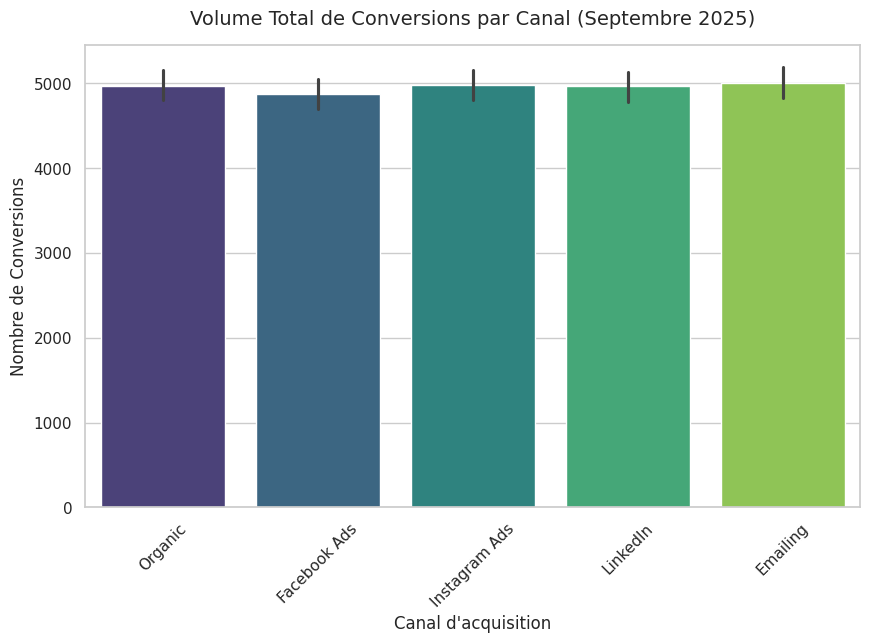

In [11]:

# Volume de conversions par canal. Question : Quel canal génère le plus gros volume de ventes ?
sns.barplot(data=df_campaigns.sort_values('conversions', ascending=False),
            x='channel', y='conversions', palette='viridis')
plt.title('Volume Total de Conversions par Canal (Septembre 2025)', fontsize=14, pad=15)
plt.xlabel('Canal d\'acquisition', fontsize=12)
plt.ylabel('Nombre de Conversions', fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/tmp/ipython-input-349701164.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_campaigns.sort_values('CPL'),


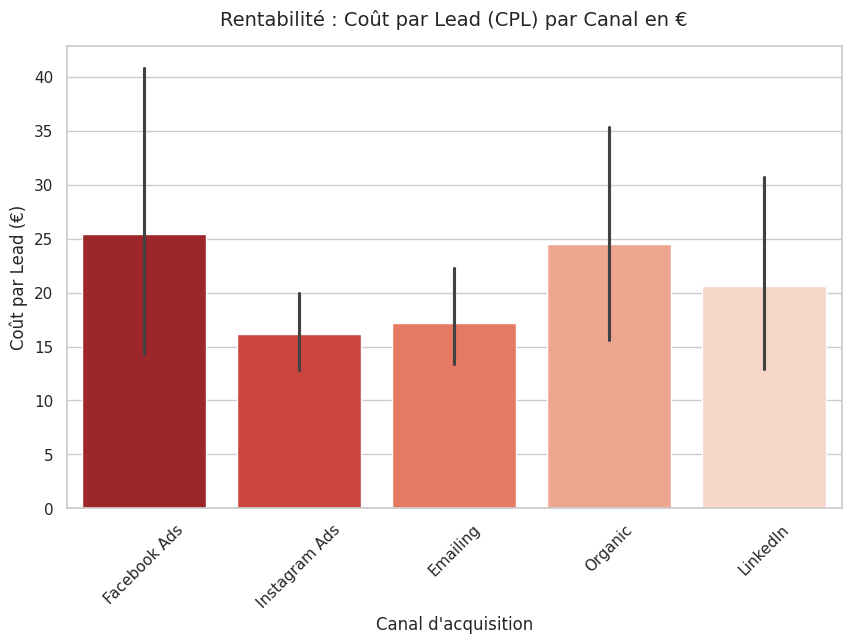

In [12]:

# Coût par Lead (CPL) par canal. Question : Quel est le canal le plus économique pour acquérir un lead ?
if 'CPL' not in df_campaigns.columns:
    df_campaigns['CPL'] = df_campaigns['cost'] / df_campaigns['conversions']

sns.barplot(data=df_campaigns.sort_values('CPL'),
            x='channel', y='CPL', palette='Reds_r')
plt.title('Rentabilité : Coût par Lead (CPL) par Canal en €', fontsize=14, pad=15)
plt.xlabel('Canal d\'acquisition', fontsize=12)
plt.ylabel('Coût par Lead (€)', fontsize=12)
plt.xticks(rotation=45)
plt.show()


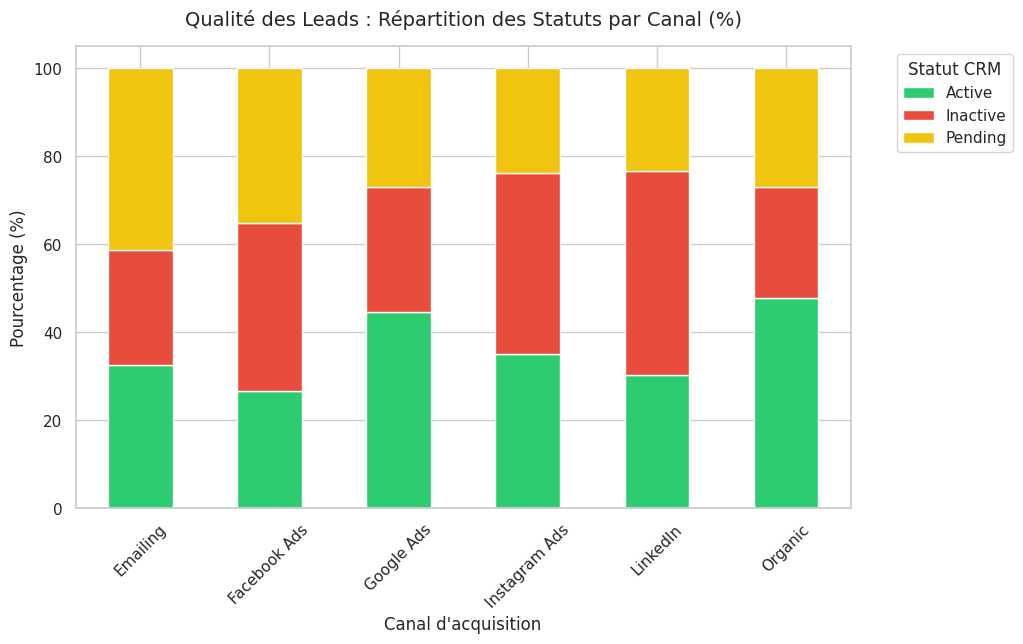

In [13]:

# Répartition des statuts CRM par canal (%). Quels canaux apportent les clients les plus "interessés" (Active) ?
status_pct = pd.crosstab(df_final['channel'], df_final['status'], normalize='index') * 100
status_pct.plot(kind='bar', stacked=True, color=['#2ecc71', '#e74c3c', '#f1c40f'])
plt.title('Qualité des Leads : Répartition des Statuts par Canal (%)', fontsize=14, pad=15)
plt.xlabel('Canal d\'acquisition', fontsize=12)
plt.ylabel('Pourcentage (%)', fontsize=12)
plt.legend(title='Statut CRM', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


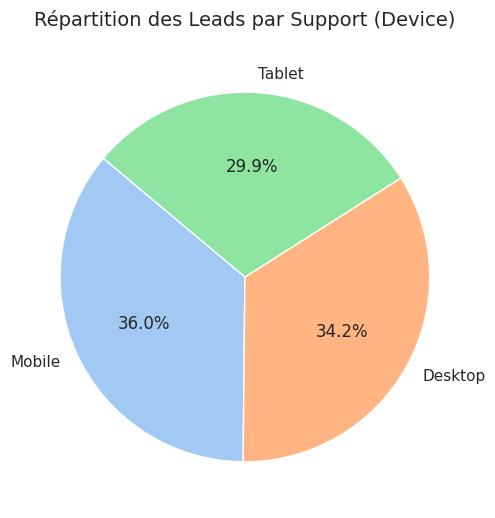

In [14]:

# Répartition des leads par Device. Question : Sur quel terminal devons-nous prioriser l'expérience utilisateur ?
device_counts = df_final['device'].value_counts()
plt.pie(device_counts, labels=device_counts.index, autopct='%1.1f%%',
        startangle=140, colors=sns.color_palette('pastel'))
plt.title('Répartition des Leads par Device', fontsize=14, pad=15)
plt.show()


/tmp/ipython-input-1905500974.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final, x='sector', palette='coolwarm',


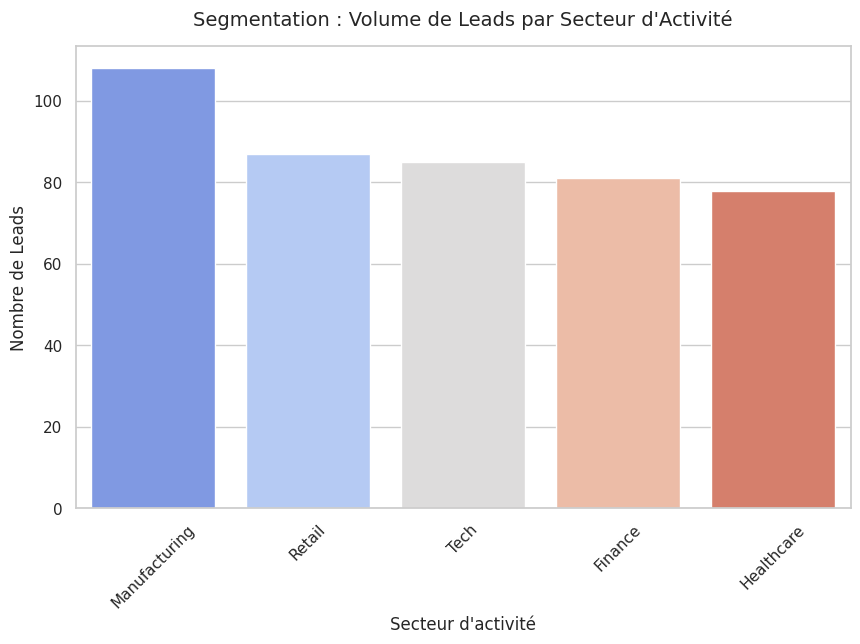

In [15]:

# Volume de leads par secteur d'activité. Quels sont les secteurs industriels les plus porteurs ?
sns.countplot(data=df_final, x='sector', palette='coolwarm',
              order=df_final['sector'].value_counts().index)
plt.title('Segmentation : Volume de Leads par Secteur d\'Activité', fontsize=14, pad=15)
plt.xlabel('Secteur d\'activité', fontsize=12)
plt.ylabel('Nombre de Leads', fontsize=12)
plt.xticks(rotation=45)
plt.show()